In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars=pd.read_csv('Cars93.csv')

In [3]:
cars.head(5)

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [4]:
cars.drop("Unnamed: 0",axis=1).columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

**Description of Data:**

The Cars93 data frame has 93 rows and 27 columns. The details of the 27 columns are as follows:

1. Manufacturer: Manufacturer of the car such as Audi, BMW, Cadillac, Chevrolet etc.

2. Model: Model of the car such as Corvette (Chevrolet), 535i (BMW) etc.

3. Type: Indicates the type of the car. Is a factor with levels "Small", "Sporty", "Compact", "Midsize", "Large" and "Van"

5. Min.Price: Minimum Price (in $1,000): price for a basic version of the car.

6. Price: Midrange Price (in $1,000): average of Min.Price and Max.Price.

7. Max.Price: Maximum Price (in $1,000): price for "a premium version" of the car.

8. MPG.city: City MPG (miles per US gallon by EPA rating).

9. MPG.highway: Highway MPG (miles per US gallon by EPA rating).

10. AirBags: Is a factor with levels "none", "driver only", and "driver & passenger".

11. DriveTrain: Indicates the drive train type of the car. Is a factor with levels: rear wheel, front wheel and 4WD.

12. Cylinders: Number of cylinders in the engine.

13. EngineSize: Size of the engine (litres).

14. Horsepower: Maximum horsepower of the car.

15. RPM: Revolutions per minute (RPM) at maximum horsepower.

16. Rev.per.mile: Engine revolutions per mile (in highest gear).

17. Man.trans.avail: Indicates if a manual transmission version is available. Is a factor with level yes or no.

18. Fuel.tank.capacity: Fuel tank capacity (US gallons).

19. Passengers: Passenger capacity (persons)

20. Length: Length of the car (inches).

21. Wheelbase: Wheelbase (inches).

22. Width: Width of the car (inches).

23. Turn.circle: U-turn space (feet).

24. Rear.seat.room: Rear seat room (inches)

25. Luggage.room: Luggage capacity (cubic feet).

26. Weight: Weight of the car (pounds).

27. Origin: Indicates the origin of the manufacturer. Is a factor with levels non-USA or USA.

28. Make: Combination of Manufacturer and Mode

The design team has a high interest in analyzing parameters that are likely to influence the mileage of a car, its turn circle and its type. Considering the above viewpoint let us eliminate the following parameters.

1. Manufacturer, Model, Make: Analysis is being done independently of the manufacturer, model and make.

2. Min.Price, Max.Price, Price: Analysis is being done independently of the price of a car

3. MPG.Highway: MPG.city and MPG.Highway are seen to follow a similar trend for a car. Hence only one of these are being considered i.e. MPG.city.

4. No. of passengers, rear seat room, luggage room, origin, manual transmission availability.

After eliminating the above said 12 parameters from the data set, the remaining 15 parameters are being considered for further study.

In [5]:
carsReduced = cars[["Type","MPG.city","AirBags","DriveTrain","Cylinders","EngineSize","Horsepower","RPM","Rev.per.mile","Fuel.tank.capacity","Length","Wheelbase","Width","Turn.circle","Weight"]]

In [6]:
carsReduced.head(5)

,Type,MPG.city,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Length,Wheelbase,Width,Turn.circle,Weight
0,Small,25,None,Front,4,1.8,140,6300,2890,13.2,177,102,68,37,2705
1,Midsize,18,Driver & Passenger,Front,6,3.2,200,5500,2335,18.0,195,115,71,38,3560
2,Compact,20,Driver only,Front,6,2.8,172,5500,2280,16.9,180,102,67,37,3375
3,Midsize,19,Driver & Passenger,Front,6,2.8,172,5500,2535,21.1,193,106,70,37,3405
4,Midsize,22,Driver only,Rear,4,3.5,208,5700,2545,21.1,186,109,69,39,3640


In [7]:
selCols=["Type","MPG.city","AirBags","DriveTrain","Cylinders","EngineSize","Horsepower","RPM","Rev.per.mile","Fuel.tank.capacity","Length","Wheelbase","Width","Turn.circle","Weight"]

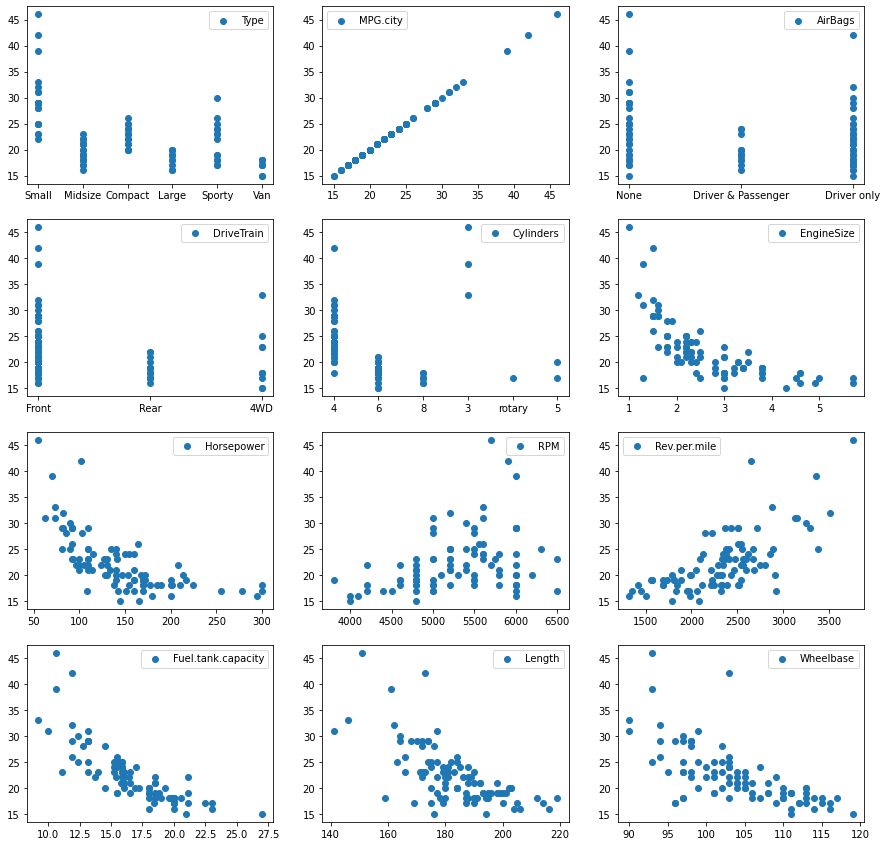

In [13]:
fig, ax = plt.subplots(4, 3,squeeze=False,figsize=(15,15))
count = 0
for i in range(4):
    for j in range(3):
        ax[i, j].scatter(carsReduced[selCols[count]],cars["MPG.city"],label=selCols[count])
        ax[i, j].legend()
        count+=1

While performing association analysis, one might consider a subset of all possible associations between variables in a dataset because all the associations may not give insight into which feature may be important in that dataset. 

Using the previous scatter plot matrix, some of the relationships can be eliminated from further analysis. For example, there might be relationships between RPM and MPG.city, RPM and Wheelbase, RPM and Horsepower, Horsepower and Wheelbase, etc. as shown below.

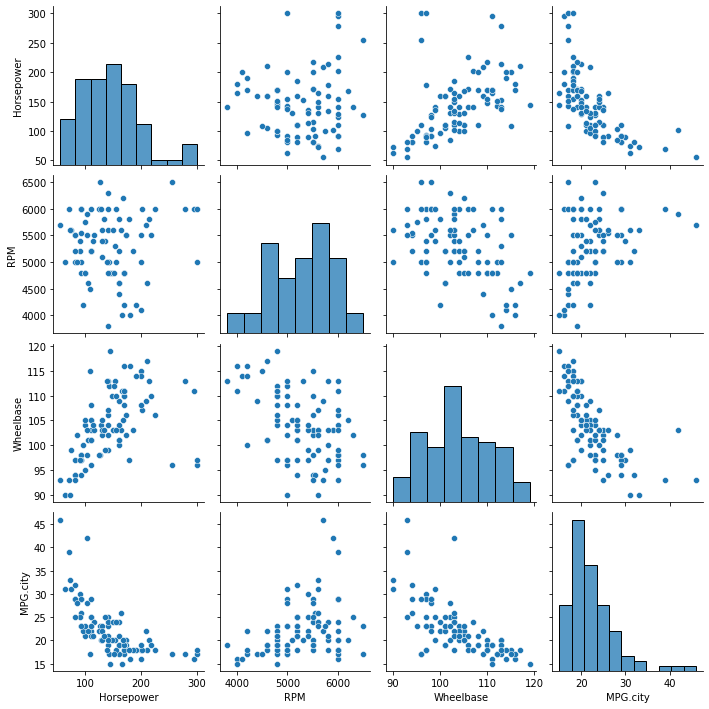

In [17]:
sns.pairplot(carsReduced, vars=["Horsepower","RPM","Wheelbase","MPG.city"])

However, the association between RPM and MPG.City, Horsepower and Wheelbase looks interesting as compared to others as it suggests a linear relationship. Therefore, one might choose these associations (RPM and MPG.city, Horsepower and Wheelbase) for further analysis.